## GROUP PROJECT 

### SARIMA BREAKDOWN

Why we pick Microsoft?

https://blog.enterprisedna.co/who-owns-chat-gpt/

OpenAI is not publicly traded and remains a private company. It is not on any stock market exchange as of the end of May 2023. So Microsoft main investor diorang

#### Import data

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# download the data
df = yf.download(tickers=['MSFT'], period='5y',interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Close'], period=20)  # Replace 12 with the suspected seasonal period

# Print the seasonal component
seasonal_component = decomposition.seasonal
print("Seasonal Component:", seasonal_component)

Seasonal Component: Date
2018-06-25    2.332793
2018-07-02    0.134624
2018-07-09   -2.079106
2018-07-16   -0.589271
2018-07-23    0.770059
                ...   
2023-05-22    3.959207
2023-05-29    5.350414
2023-06-05    0.799395
2023-06-12    0.921124
2023-06-19    2.332793
Name: seasonal, Length: 261, dtype: float64


In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Close'], period=12)  # Replace 12 with the suspected seasonal period

# Print the seasonal component
seasonal_component = decomposition.seasonal
print("Seasonal Component:", seasonal_component)

Seasonal Component: Date
2018-06-25    2.998223
2018-07-02    1.740801
2018-07-09    0.851101
2018-07-16    1.649347
2018-07-23    0.896183
                ...   
2023-05-22    0.896183
2023-05-29   -0.627652
2023-06-05   -1.764913
2023-06-12   -2.258840
2023-06-19   -2.361681
Name: seasonal, Length: 261, dtype: float64


Here, we import data using yahoo finance library

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-25,100.000000,100.110001,97.260002,98.610001,93.265129,148332800
2018-07-02,98.099998,101.430000,98.000000,101.160004,95.676888,72446800
2018-07-09,101.650002,105.599998,101.099998,105.430000,99.715469,106120800
2018-07-16,105.400002,108.199997,103.889999,106.269997,100.509911,173358100
2018-07-23,106.300003,111.150002,106.129997,107.680000,101.843513,155103100


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-22,318.600006,333.399994,312.609985,332.890015,332.890015,158230100
2023-05-29,335.230011,337.500000,324.720001,335.399994,335.399994,128091600
2023-06-05,335.220001,338.559998,322.500000,326.790009,326.790009,128213000
2023-06-12,328.579987,351.470001,325.160004,342.329987,342.329987,158648100
2023-06-19,339.309998,342.079987,332.070007,335.019989,335.019989,119342585


In [6]:
print("Total Rows:", df.shape[0])

Total Rows: 261


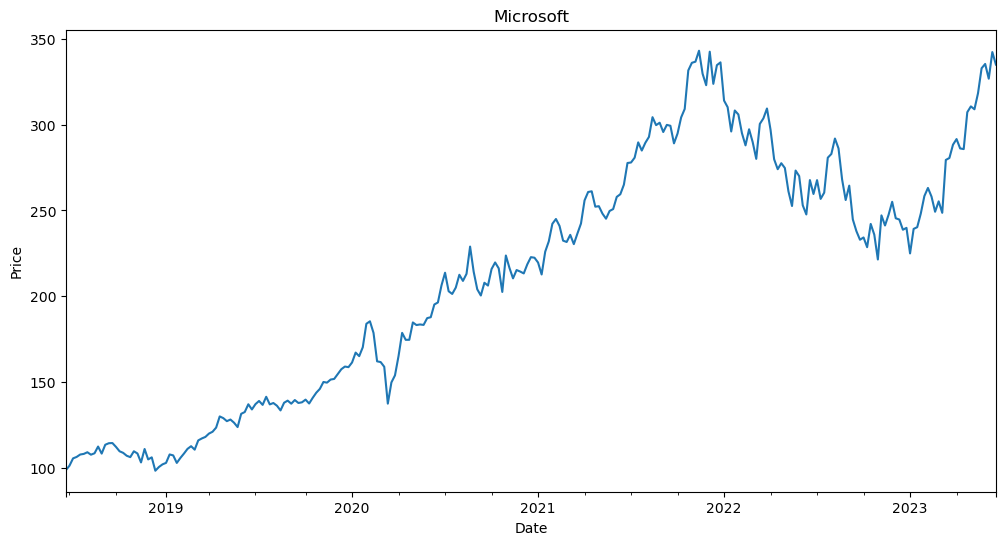

In [7]:
# plot the Close column with a title
df['Close'].plot(figsize=(12, 6))
plt.title("Microsoft")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

The observation from the timeseries exhibit an overall

a) Overall Upward Trend
- mean is not constant


b) Slight Seasonality pattern
- we can see that some slight seasonality pattern going on in certain period such as from early 2021 until 2022 in upward trend and also from 2022 until 2023 in small pullback trend.


c) Moderate Volatility 
- we can see a moderate volatility going on for example in beginning of 2020 and quite fluctuation from 2022 until 2023.
- standard deviation is not constant

We can observe that the recent portion of the time series has reached an all-time high, indicating a potential pullback in the upcoming quarter.

The observed behavior of reaching all-time highs and a potential pullback in the time series can be related to the investment landscape in the AI industry in 2023. Here's a possible explanation:

Increased AI Investment: The year 2023 may have experienced a surge in AI investment, driven by growing recognition of AI's potential and its impact across industries. Increased funding and investment in AI startups, research initiatives, and AI-focused companies could have contributed to the all-time highs in the time series. The positive sentiment surrounding AI and its perceived long-term value may have attracted significant capital inflows.

Market Speculation and Sentiment: The all-time highs could be partially influenced by market speculation and investor sentiment in 2023. As AI continues to capture public attention and demonstrate its potential for disruption, optimistic sentiment and high expectations may have driven market participants to invest in AI-related assets. However, when sentiment becomes overly speculative or market participants reassess valuations, it can lead to a potential pullback.

Technological Advancements and Innovation: The year 2023 may have witnessed notable advancements and breakthroughs in AI technologies, further fueling investor interest and confidence in the sector. These advancements, such as developments in machine learning algorithms, natural language processing, computer vision, or AI-driven applications, could have heightened expectations and contributed to the all-time highs in the time series.

Market Dynamics and Volatility: The AI investment landscape in 2023 could have been subject to market dynamics and volatility. Changes in regulations, emerging competition, shifts in consumer preferences, or global economic conditions might have influenced the behavior of AI investments. Such market dynamics can contribute to fluctuations in prices, leading to both all-time highs and subsequent pullbacks.

Long-Term Growth Prospects: The all-time highs in the time series might reflect investors' belief in the long-term growth prospects of the AI industry. The expectation of AI technologies transforming industries, improving productivity, and driving innovation can create positive sentiment and contribute to significant investment flows. However, periodic pullbacks can occur as investors reassess valuations and adjust their positions.

It's important to note that the relationship between the observed behavior and AI investment in 2023 is hypothetical and based on general market dynamics. The actual behavior of the time series will depend on various factors specific to the AI industry, investment climate, and market conditions during that period.

The fluctuation in the stock price of Microsoft towards the end of 2022 can be influenced by various factors, including the release of ChatGPT and other relevant dynamics. Here's a possible explanation:

ChatGPT Release: The release of ChatGPT, an AI language model, could generate market interest and impact investor sentiment. The launch of innovative AI technologies can attract attention and potentially create positive expectations for the company behind the technology, in this case, Microsoft. Investors may anticipate the potential positive impact of ChatGPT on Microsoft's business performance and future prospects, leading to increased demand for the stock and a corresponding rise in its price.

Market Sentiment and Expectations: The market sentiment surrounding AI and its potential applications can influence stock prices. Positive sentiment towards the AI industry, driven by advancements, adoption, and market enthusiasm, can impact the valuation of AI-related companies like Microsoft. As the release of ChatGPT aligns with the growing interest in AI, it may contribute to the stock price fluctuation.

Investor Speculation and Trading Activity: The release of significant news or technological developments often attracts speculative trading activity. Traders and investors may engage in short-term buying or selling based on their interpretation of the news and their expectations of potential market reactions. This increased trading activity can lead to price fluctuations in the stock, particularly around the time of the ChatGPT release.

Company Performance and Financial Results: The stock price movement may also be influenced by Microsoft's overall financial performance and market position. If the company reports positive financial results, exceeds market expectations, or demonstrates strong growth prospects, it can contribute to an upward trend in the stock price. Conversely, disappointing results or negative news can lead to downward pressure on the stock.

Market and Economic Factors: It's essential to consider broader market and economic conditions that may have impacted Microsoft's stock price. Factors such as interest rates, geopolitical events, industry trends, or macroeconomic indicators can influence investor sentiment and overall market movements, which may affect the stock price of Microsoft and other companies in the AI industry.

It's important to note that the above explanations are speculative and hypothetical. Actual stock price movements result from a complex interplay of various factors, including market dynamics, investor sentiment, company performance, and economic conditions. Conducting detailed research, analyzing financial reports, and monitoring market trends can provide a more accurate understanding of the specific drivers behind the observed fluctuations in Microsoft's stock price.

### Seasonal Decompose

<Figure size 640x480 with 0 Axes>

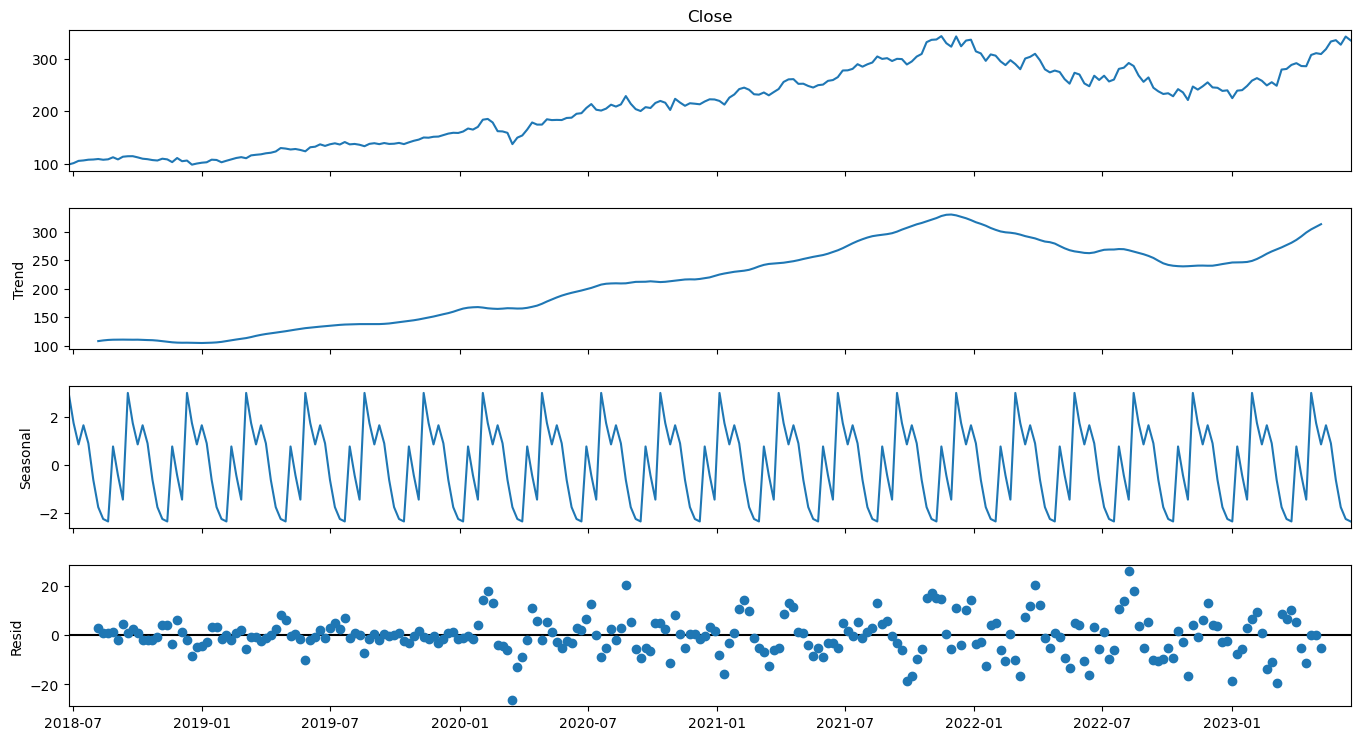

In [8]:
#see the trend and seasonal of data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [9]:
#Split time series data into in-sample & out-sample data
training = df[:-26]['Close']
testing = df[-26:]['Close']

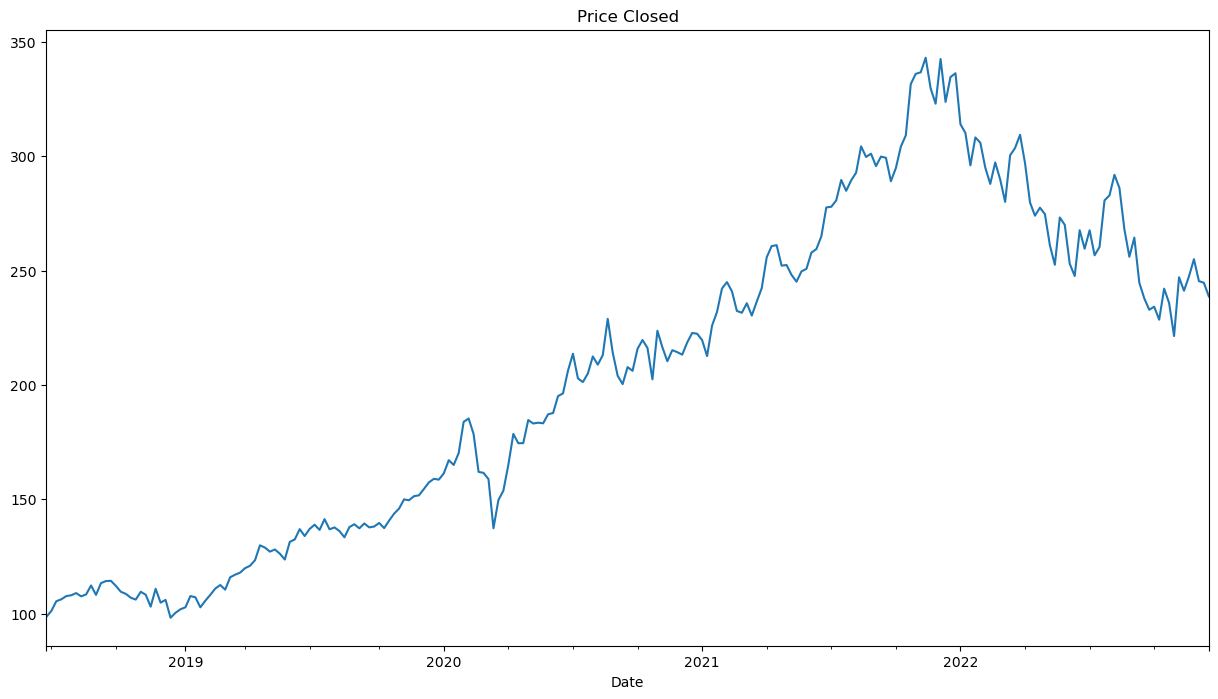

In [10]:
#plot the in-sample data

from matplotlib import pyplot
training.plot(figsize=(15, 8),title = 'Price Closed', fontsize = 10)
pyplot.show()

Trend
- Aligned with initial observation, we can see the timeseries is going uptrend then doing a slight pull back at the mid of 2022 and rise up again starting 2023 hitting all time high ceiling

Seasonal 
- We can see there is a pattern going on here as probably due to natural dynamics of the market

Residual
- Here, we can see the randomness of the data where we can explained the behaviour.


### Part Two : Descriptive statistics
We want to see the characteristics of time series data
1. Normality 2. Skewness 3. Kurtosi

In [11]:
#normality for in-sample data
from scipy.stats import shapiro
shapiro(training)

ShapiroResult(statistic=0.9390385150909424, pvalue=2.5517993051948906e-08)

$H_0$: The time series is normally distributed\
$H_1$: The time series is not normally distributed\
\
$p-value=0.0000$\
\
Since $(p-value=0.0000)<(\alpha=0.05)$, reject $H_0$.\
\
At $\alpha=0.05$, the time series is not normally distributed.

In [12]:
#skewness in-sample data
from scipy.stats import skew
skew(training)

0.07517546702120956

A skewness value of -0.0474 indicates a slight left skew or negative skewness in the distribution of the data. Skewness measures the asymmetry of a probability distribution. It quantifies the degree to which a distribution deviates from a symmetric (bell-shaped) distribution.

In the case of a negative skewness, the tail of the distribution is stretched towards the left side, indicating a longer or fatter tail on the left side of the distribution compared to the right side. This suggests that there may be a few unusually low values in the data, causing the leftward deviation from symmetry.

<Axes: >

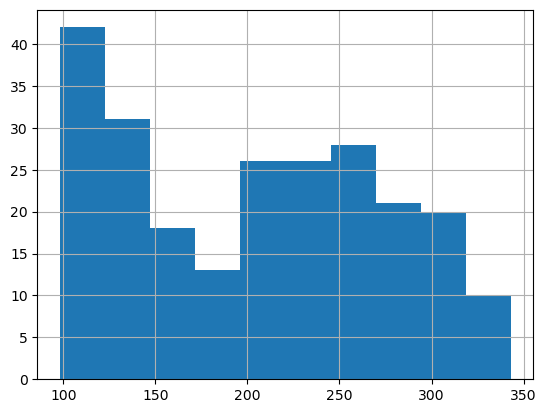

In [13]:
#histogram in-sample data
training.hist()

The shape of the histogram mirrors the skewness in the data distribution.

#### Kurtosis

In [14]:
#kurtosis in-sample data
from scipy.stats import kurtosis
kurtosis(training)

-1.2552948620214355

A kurtosis value of -1.2606 indicates that the data distribution has flatter and less extreme tails compared to a normal distribution. It suggests that the data points are less likely to be far away from the average and there are fewer outliers. The distribution is relatively more spread out and has a flatter peak.

### Model Identification

Now we want to check which SARIMA combination we will use :D

a) Stationarity in-variance : Use Box-Cox transformation to check the stationarity in-variance

In [15]:
#Box-cox transformation (check stationarity in variance)
import scipy as sp
from scipy.stats import boxcox
Bread, lam = boxcox(training)
lam

0.5550899910645115

Running the transformation discovers the $\lambda=0.7821$ indicating that transformation is needed.

### Transformation

In [16]:
#transform data using power
import numpy as np
transform_training = np.sqrt(training) #transform training data

In [17]:
transform_training.head()

Date
2018-06-25     9.930257
2018-07-02    10.057833
2018-07-09    10.267911
2018-07-16    10.308734
2018-07-23    10.376897
Name: Close, dtype: float64

In [18]:
#stationary test using ADF test (to check stationarity in mean)
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(transform_training)[1])

p-value: 0.5105259876077028


$H_0$: The time series is non-stationary in mean\
$H_1$: The time series is stationary in mean\
\
$p-value=0.7003$\
\
Since $p-value=0.7003>\alpha=0.05$ do reject $H_0$.\
\
At $\alpha=0.05$, the time series is non stationary in-mean.

We need to do different to make it stationary in mean

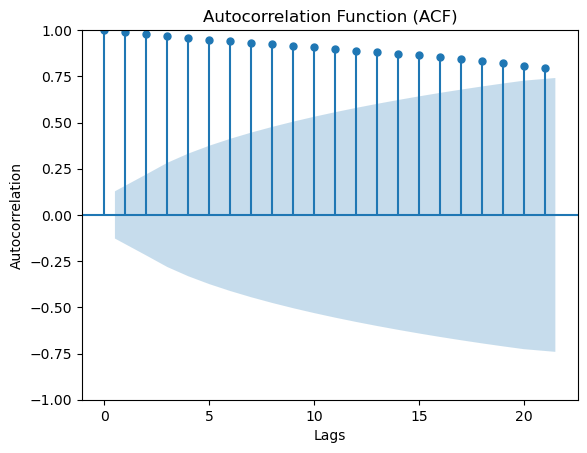

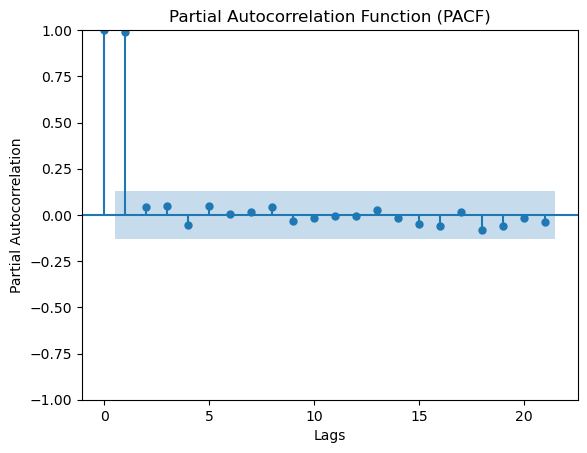

In [21]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(transform_training, lags=21)
pyplot.xlabel('Lags')
pyplot.ylabel('Autocorrelation')
pyplot.title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(transform_training, lags=21)
pyplot.xlabel('Lags')
pyplot.ylabel('Partial Autocorrelation')
pyplot.title('Partial Autocorrelation Function (PACF)')

pyplot.show()


The ACF plot reveals that the autocorrelation coefficients have relatively large values, and the ACF values decrease gradually as the lags increase. This pattern suggests that the data is not stationary in terms of its mean. To address this issue, differencing is required.

### Stabilist the mean using differencing

#### Non - Seasonal

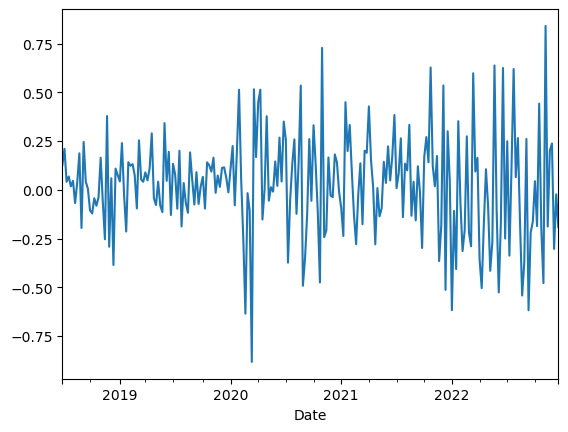

In [22]:
#first differencing
diff_1 = transform_training.diff(1).dropna()
from matplotlib import pyplot
diff_1.plot()
pyplot.show()

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

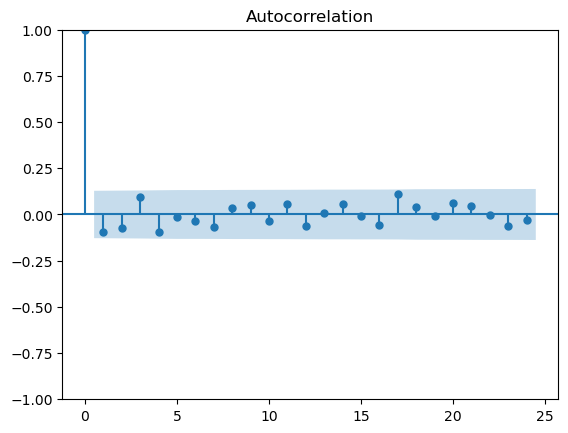

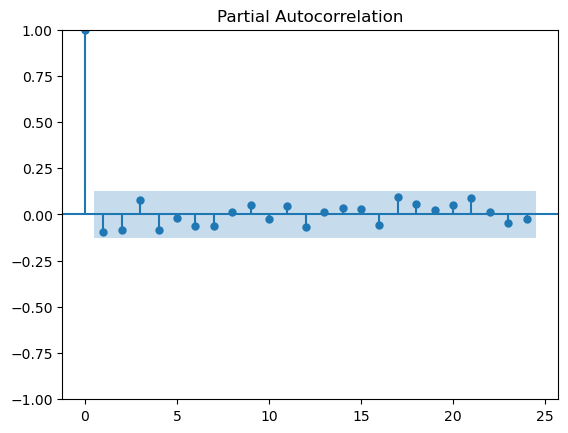

In [23]:
#plot ACF & PACF after first differencing
plot_acf(diff_1),plot_pacf(diff_1)


In [24]:
#stationary test using ADF test (to check stationarity in mean)
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(diff_1)[1])

p-value: 1.5192169550593004e-29


i)The time series data is stationary in-mean (nonseasonal part)

$H_0$: The time series is non-stationary in-mean\
$H_1$: The time series is stationary in-mean\
\
$p-value=0.0000$\
\
Since $p-value=0.0000<\alpha=0.05$ reject $H_0$.\
\
At $\alpha=0.05$, the time series is stationary in-mean.



ii) From ACF plot : value q=0,1\
    From PACF plot : value p=0,1

d=1


#### Seasonal

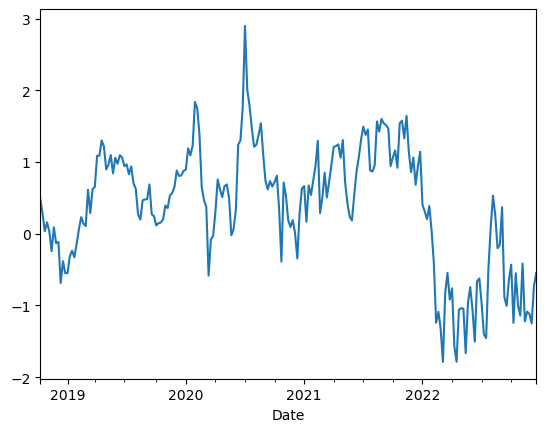

In [25]:
# first seasonal differencing(to remove the seasonality of the data)
diff_seasonal_1 = transform_training.diff(16).dropna()
from matplotlib import pyplot
diff_seasonal_1.plot()
pyplot.show()

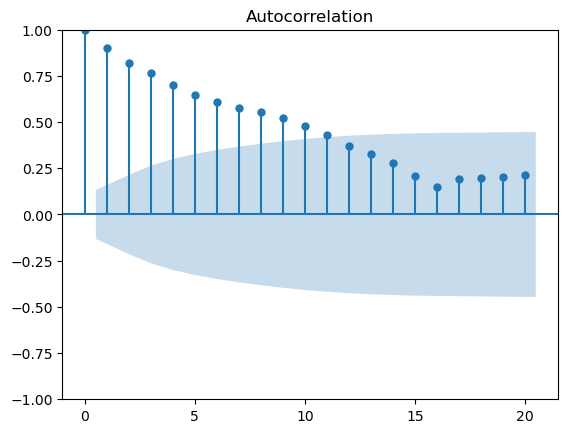

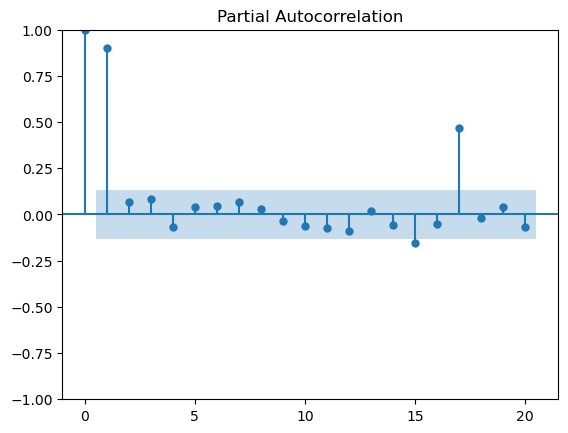

In [26]:
#plot acf and pacf for first seasonal differencing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(diff_seasonal_1, lags = 20),plot_pacf(diff_seasonal_1, lags=20)
plt.show()

In [27]:
#stationary test using ADF test (to check stationarity in mean)
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(diff_seasonal_1)[1])

p-value: 0.017500742040525263


$H_0$: The time series is non-stationary\
$H_1$: The time series is stationary\
\
$p-value=0.2278$\
\
Since $p-value=0.2278 > \alpha=0.05$, do not reject $H_0$.\
\
At $\alpha=0.05$, the time series is not stationary in-mean.

### Still not stationary-in-mean so we perform second differencing

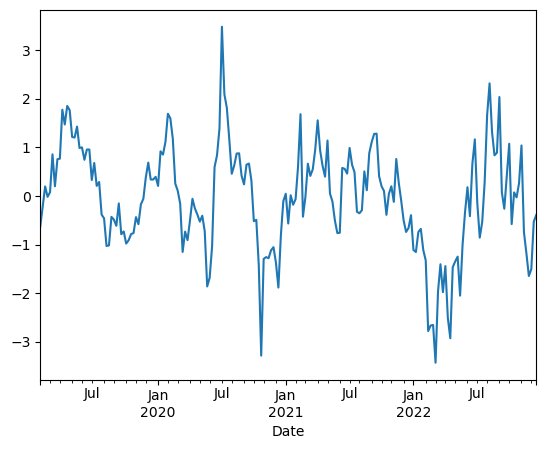

In [28]:
# second seasonal differencing(to remove the seasonality of the data)
diff_seasonal_2 = diff_seasonal_1.diff(16).dropna()
from matplotlib import pyplot
diff_seasonal_2.plot()
pyplot.show()

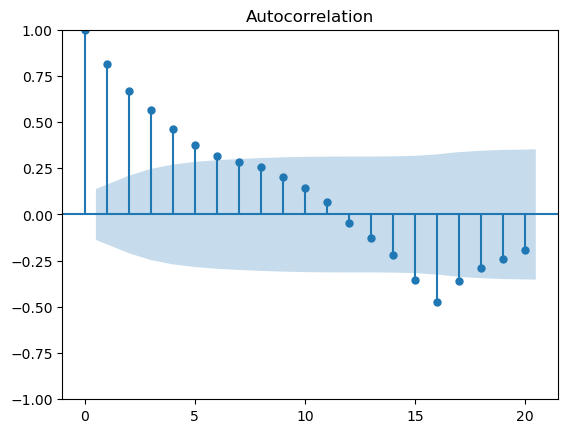

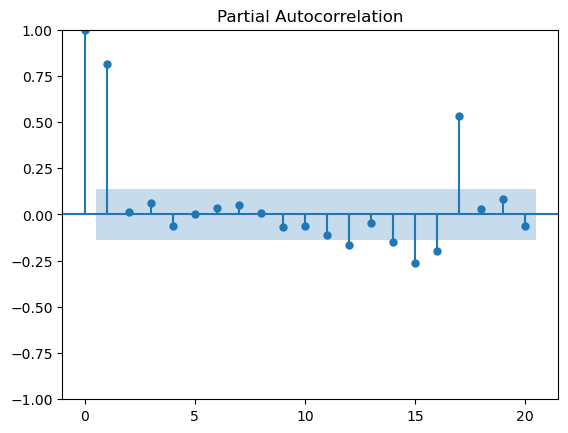

In [29]:
#plot acf and pacf for first seasonal differencing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(diff_seasonal_2, lags = 20),plot_pacf(diff_seasonal_2, lags=20)
plt.show()

In [30]:
#stationary test using ADF test (to check stationarity in mean)
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(diff_seasonal_2)[1])

p-value: 8.634681973116114e-10


$H_0$: The time series is non-stationary\
$H_1$: The time series is stationary\
\
$p-value=0.0351$\
\
Since $p-value=0.0351 < \alpha=0.05$, reject $H_0$.\
\
At $\alpha=0.05$, the time series is stationary in-mean.

### Which ARIMA to choose?

The appropriate model for the given data, which is non-stationary in mean and has undergone differencing to achieve stationarity, is **SARIMA** because it has seasonality and not stationary.

The time series is stationary-in-mean

Seasonal  
ACF = 0,1    
PACF = 0,1   
D = 1


No-Seasonal  
ACF = 0,1,2,3,4  
PACF = 0,1  
D = 2 

Seasonal Component:

ACF: The ACF for the seasonal component shows significant autocorrelation at lag 1, indicating a seasonal order of 1.
PACF: The PACF for the seasonal component shows significant partial autocorrelation at lag 1, suggesting a seasonal order of 1.
D: The seasonal differencing required is 1.
Based on the above information, we can identify the seasonal component of the SARIMA model as SARIMA(0, 1, 1)(0, 1, 0, 1).

Non-Seasonal Component:

ACF: The ACF for the non-seasonal component shows significant autocorrelation at lags 0, 1, 2, 3, and 4, indicating a non-seasonal order of 4.
PACF: The PACF for the non-seasonal component shows significant partial autocorrelation at lags 0 and 1, suggesting a non-seasonal order of 1.
D: The non-seasonal differencing required is 2.


model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 16))

Optimal model: **SARIMA(1, 1, 1)(0, 1, 1, 1)_16**

### Forecast

C:\Users\snapt\anaconda3\envs\mini_project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\snapt\anaconda3\envs\mini_project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  235
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 16)   Log Likelihood                -778.646
Date:                            Sun, 25 Jun 2023   AIC                           1565.291
Time:                                    22:23:48   BIC                           1578.829
Sample:                                06-25-2018   HQIC                          1570.760
                                     - 12-19-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4732      0.432      1.095      0.273      -0.374       1.320
ma.L1         -0.5714      0.395   

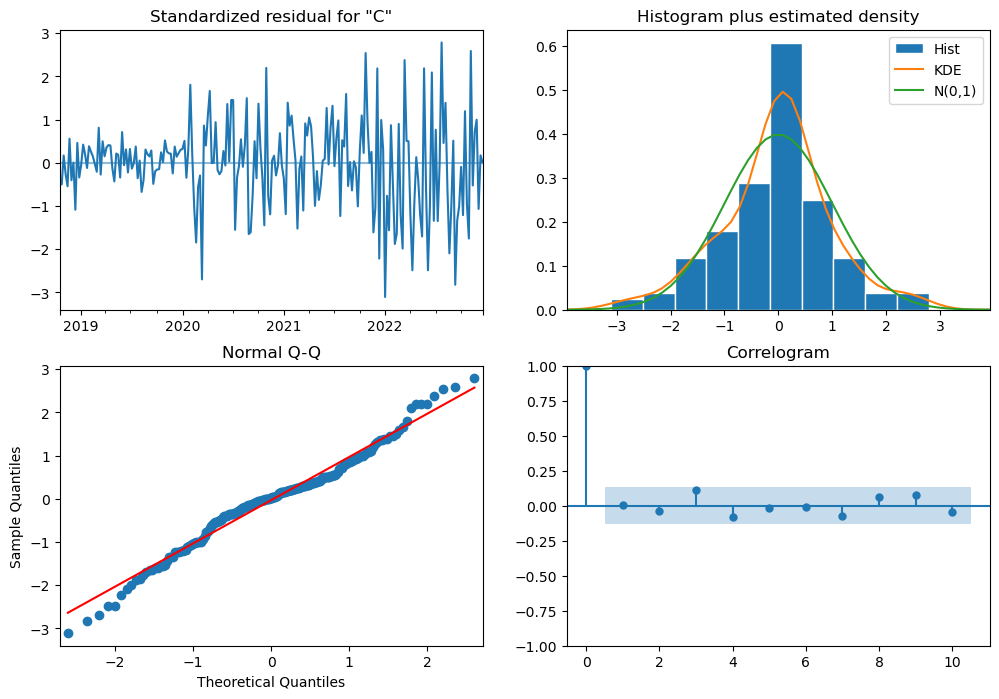

In [31]:
import pandas as pd
import statsmodels.api as sm

# Create the SARIMA model with the identified order
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (0, 1, 1, 16)  # (P, D, Q, s)
model = sm.tsa.SARIMAX(training, order=order, seasonal_order=seasonal_order)

# Fit the model to the data
results = model.fit()

# Print the model summary
print(results.summary())

# Perform model diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()


This summary table provides the results of a Seasonal Autoregressive Integrated Moving Average (SARIMAX) model. Let's break down some key elements of this output:

1.  **Model Parameters (Coef)**: The model's estimated parameters for the AR term (`ar.L1`), the MA term (`ma.L1`), the seasonal MA term (`ma.S.L16`), and the estimated variance (`sigma2`) are given in the `coef` column. Their respective standard errors and Z-scores (which is the coefficient divided by its standard error) are also listed.
    
    *   The AR term `ar.L1` is slightly positive (0.4732) but it is not statistically significant at a standard 0.05 level as its p-value (P>|z|) is above 0.05.
    *   The MA term `ma.L1` is negative (-0.5714) and it also isn't statistically significant.
    *   The seasonal MA term `ma.S.L16` is significantly negative (-0.9080) at a standard 0.05 level indicating it is a significant parameter in the model. This implies that the seasonal component is very important in explaining the behavior of the series.
    *   `sigma2` represents the variance of the residuals. The estimated value is around 65.52.
2.  **Model Fit Statistics**: Log-Likelihood, AIC, BIC, and HQIC are all measures of the quality of the model. Lower values indicate a better fit. This model has an AIC of 1565.291, BIC of 1578.829, and HQIC of 1570.760.
    
3.  **Diagnostic Tests**:
    
    *   Ljung-Box test (Q): Tests for remaining autocorrelation in the residuals. The higher the p-value (Prob(Q)), the less evidence there is against the null hypothesis of no autocorrelation. Here, the p-value is 0.98, suggesting that there is no significant autocorrelation in the residuals.
        
    *   Jarque-Bera test (JB): Tests whether the residuals have the skewness and kurtosis matching a normal distribution. The higher the p-value (Prob(JB)), the more the data are similar to a normal distribution. The p-value here is 0.05, which is borderline at a standard 0.05 level.
        
    *   Heteroskedasticity Test (H): Tests for constant variance in the residuals (homoscedasticity). A high p-value (Prob(H)) would support the null hypothesis of homoscedasticity. Here, the p-value is 0.00 indicating the residuals have non-constant variance (heteroscedastic).
        

In conclusion, the model seems to capture the seasonality in the data well but the diagnostics suggest some improvements could be made. The lack of significance for some parameters and the heteroskedastic nature of residuals suggest a need for model refinement or a different approach.